<ipython-input-1-1faf13dffdba>:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


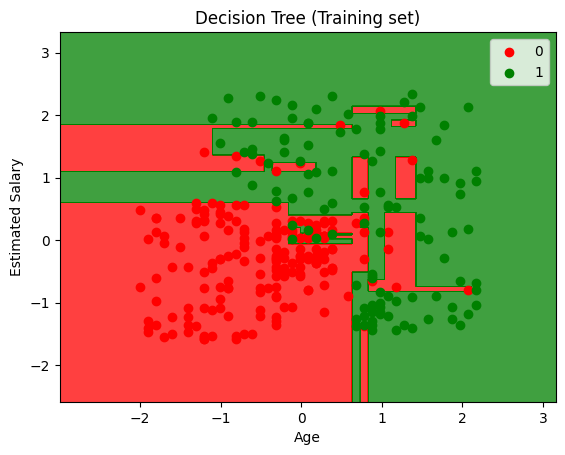

<ipython-input-1-1faf13dffdba>:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


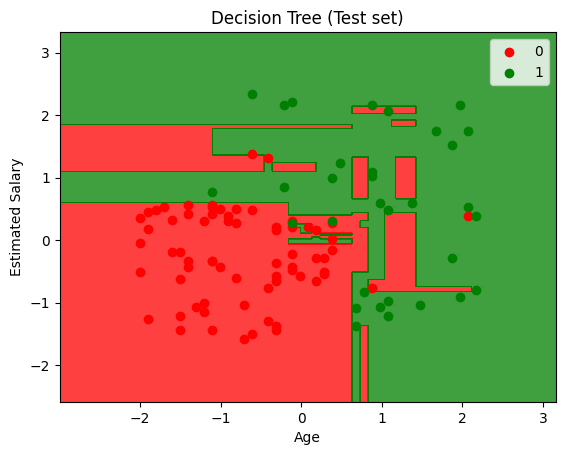

In [1]:
# Importing the required libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For handling datasets

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')  # Load dataset from CSV file
X = dataset.iloc[:, [2, 3]].values  # Selecting Age and Estimated Salary columns as features
y = dataset.iloc[:, 4].values  # Selecting Purchased column as the target variable

# Splitting the dataset into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # 25% test size

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()  # Standardization (zero mean, unit variance)
X_train = sc_X.fit_transform(X_train)  # Fit and transform training data
X_test = sc_X.transform(X_test)  # Transform test data using the same scale

# Training the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Using entropy for splits
classifier.fit(X_train, y_train)  # Fitting the classifier to the training set

# Predicting the Test set results
y_pred = classifier.predict(X_test)  # Predicting the output for test data

# Evaluating model performance using Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  # Creating a confusion matrix to check accuracy

# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train  # Assigning training data for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))  # Creating grid

# Plot decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())  # Setting x-axis limit
plt.ylim(X2.min(), X2.max())  # Setting y-axis limit

# Plot training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree (Training set)')  # Title of the plot
plt.xlabel('Age')  # X-axis label
plt.ylabel('Estimated Salary')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

# Visualizing the Test set results
X_set, y_set = X_test, y_test  # Assigning test data for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))  # Creating grid

# Plot decision boundary for test set
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())  # Setting x-axis limit
plt.ylim(X2.min(), X2.max())  # Setting y-axis limit

# Plot test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree (Test set)')  # Title of the plot
plt.xlabel('Age')  # X-axis label
plt.ylabel('Estimated Salary')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot
